### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
tf.random.set_seed(42)

### Collect Data

In [3]:
import keras

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [6]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)

In [7]:
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

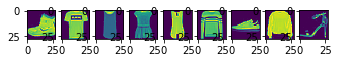

In [19]:
import matplotlib.pyplot as plt
for i in range(0, 9):
    plt.subplot(1, 10, i + 1)
    plt.imshow(trainX[i])

In [10]:
# Labels for the first 10 images in the training data

import numpy as np
print(np.where(trainY[:10] == 1)[1])

[9 0 0 3 0 2 7 2 5 5]


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [11]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 158us/sample - loss: 2008.2224 - accuracy: 0.7387 - val_loss: 1383.4051 - val_accuracy: 0.7851
Epoch 2/50
60000/60000 [==============================] - 9s 144us/sample - loss: 1635.8757 - accuracy: 0.7778 - val_loss: 2599.6534 - val_accuracy: 0.6583
Epoch 3/50
60000/60000 [==============================] - 8s 129us/sample - loss: 1543.6133 - accuracy: 0.7861 - val_loss: 3101.9444 - val_accuracy: 0.7681
Epoch 4/50
60000/60000 [==============================] - 8s 131us/sample - loss: 1503.9179 - accuracy: 0.7884 - val_loss: 1101.7666 - val_accuracy: 0.8155
Epoch 5/50
60000/60000 [==============================] - 7s 119us/sample - loss: 1477.7012 - accuracy: 0.7936 - val_loss: 977.8621 - val_accuracy: 0.8121
Epoch 6/50
60000/60000 [==============================] - 7s 119us/sample - loss: 1497.8763 - accuracy: 0.7930 - val_loss: 1122.4718 - val_accuracy: 0.7993
Epoch 7/50
6000

### Execute the model using model.fit()

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [13]:
model = tf.keras.models.Sequential()
# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [14]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 175us/sample - loss: 0.5955 - accuracy: 0.7956 - val_loss: 0.5088 - val_accuracy: 0.8241
Epoch 2/50
60000/60000 [==============================] - 8s 137us/sample - loss: 0.4907 - accuracy: 0.8306 - val_loss: 0.4866 - val_accuracy: 0.8305
Epoch 3/50
60000/60000 [==============================] - 8s 140us/sample - loss: 0.4679 - accuracy: 0.8390 - val_loss: 0.4876 - val_accuracy: 0.8356
Epoch 4/50
60000/60000 [==============================] - 8s 140us/sample - loss: 0.4555 - accuracy: 0.8420 - val_loss: 0.4724 - val_accuracy: 0.8368
Epoch 5/50
60000/60000 [==============================] - 9s 152us/sample - loss: 0.4502 - accuracy: 0.8454 - val_loss: 0.4656 - val_accuracy: 0.8405
Epoch 6/50
60000/60000 [==============================] - 9s 148us/sample - loss: 0.4445 - accuracy: 0.8462 - val_loss: 0.4564 - val_accuracy: 0.8415
Epoch 7/50
60000/60000 [=========================

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [16]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
# Normalize the data
model.add(tf.keras.layers.BatchNormalization())
# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [20]:
# sgd Optimizer
sgd = tf.keras.optimizers.SGD(lr=0.01)
# Compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 204us/sample - loss: 0.5998 - accuracy: 0.7952 - val_loss: 0.5109 - val_accuracy: 0.8282
Epoch 2/50
60000/60000 [==============================] - 10s 173us/sample - loss: 0.4909 - accuracy: 0.8318 - val_loss: 0.4931 - val_accuracy: 0.8301
Epoch 3/50
60000/60000 [==============================] - 10s 159us/sample - loss: 0.4685 - accuracy: 0.8382 - val_loss: 0.4934 - val_accuracy: 0.8354
Epoch 4/50
60000/60000 [==============================] - 8s 141us/sample - loss: 0.4562 - accuracy: 0.8430 - val_loss: 0.4811 - val_accuracy: 0.8366
Epoch 5/50
60000/60000 [==============================] - 9s 142us/sample - loss: 0.4507 - accuracy: 0.8446 - val_loss: 0.4724 - val_accuracy: 0.8398
Epoch 6/50
60000/60000 [==============================] - 9s 146us/sample - loss: 0.4447 - accuracy: 0.8456 - val_loss: 0.4593 - val_accuracy: 0.8399
Epoch 7/50
60000/60000 [=======================

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [22]:
model = tf.keras.models.Sequential()
# Input Layer
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [23]:
# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [24]:
# Adding layers
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

# Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [25]:
sgd = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

### Run the model

In [26]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 15s 249us/sample - loss: 1.0213 - accuracy: 0.6897 - val_loss: 0.6330 - val_accuracy: 0.7769
Epoch 2/50
60000/60000 [==============================] - 13s 224us/sample - loss: 0.5733 - accuracy: 0.7974 - val_loss: 0.5129 - val_accuracy: 0.8162
Epoch 3/50
60000/60000 [==============================] - 13s 214us/sample - loss: 0.4909 - accuracy: 0.8260 - val_loss: 0.4692 - val_accuracy: 0.8323
Epoch 4/50
60000/60000 [==============================] - 13s 220us/sample - loss: 0.4532 - accuracy: 0.8379 - val_loss: 0.4420 - val_accuracy: 0.8403
Epoch 5/50
60000/60000 [==============================] - 13s 215us/sample - loss: 0.4318 - accuracy: 0.8469 - val_loss: 0.4265 - val_accuracy: 0.8462
Epoch 6/50
60000/60000 [==============================] - 13s 220us/sample - loss: 0.4148 - accuracy: 0.8512 - val_loss: 0.4177 - val_accuracy: 0.8510
Epoch 7/50
60000/60000 [====================